# 02 Hypothesis Testing (t-test)
By Paul Tuccinardi

## What is Hypothesis Testing?

Hypothesis Testing is used to compare a group means to determine if they are statistically different. 

There are a few methods for Hypothesis Testings:

### One-sample t-test
One-sample T-test is used to compare one group mean to a known value

### Independent samples t-test
Independent t-tests compare 2 separate group means 

### Paired Samples t-test
Paired Samples t-test compares means of the same group but from before and after certain conditions


### One-sample t-test

In [2]:
import pandas as pd
import numpy as np
# 1. Load the dataset object
df = pd.read_csv('housing.csv')

# 2. Display the first few rows to verify the load
print("--- Python DataFrame Head ---")
print(df.head())

--- Python DataFrame Head ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Let's perform a one sample t-test using the income data

In [3]:
x = df['median_income']

The formula for calculating the one sample t-Test is 
$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}

$$

${\bar{x}}$ = sample mean

${\mu}$ = Hypothesized mean of population

${s}$ = sample standard deviation

${n}$ = sample size

In [4]:
mean = np.mean(x)
std_dev = np.std(x, ddof=1)  # Sample standard deviation
n = len(x)
#lets assume the population mean
pop_mean = 3

In [5]:
# Calculate the t-statistic
t_statistic = (mean - pop_mean) / (std_dev / np.sqrt(n))
print(f"T-statistic: {t_statistic}")

T-statistic: 65.84094859143516


### How do we interpret these results?
The results should indicate to reject the hypothesis, the T value we recieved provides support to say there is an overwhelming amount of data that the sample mean and the hypothesized mean are not equal. When the result is positive it indicates that the actual mean is higher than our hypothesis.


### Independent samples t-test

The formulas for independent samples t-test is the following:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

**Where pooled standard deviation ($s_p$) is:**
$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$


It can be noticed that there are some new variables entering the equation that were not in the one sample t-test.

${\bar{x}_2}$ = sample mean of the second group, 

${n_1}$ = sample size of the first variable

${n_2}$ = sample size of the second variable

${s_1^2, s_2^2}$: Sample variances for each group

In [6]:
#first we are going to define our variables
x1 = df['median_income'][df['ocean_proximity'] == '<1H OCEAN']
x2 = df['median_income'][df['ocean_proximity'] == 'INLAND']

n1 = len(x1)
n2 = len(x2)

mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1, ddof=1)
std2 = np.std(x2, ddof=1)

In [7]:
sp = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

In [8]:
from scipy import stats


t_statistic = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n1 + n2 - 2))
print(f"T-statistic for two-sample t-test: {t_statistic}")
print(f"P-value for two-sample t-test: {p_value}")

T-statistic for two-sample t-test: 35.303689506012084
P-value for two-sample t-test: 0.0


### How do we interpret these results?
This t-statistic indicates that the ocean incomes are higher than the inland incomes. With the p-value of 0 we can reject the null hypothesis.

### Paired Samples t-test

The equation for paired samples t-test is the following:

$$t = \frac{\bar{D}}{\frac{s_D}{\sqrt{n}}}$$

Again there are some new variables so let's define them

$ {\bar{D}} $ = The mean of the differences between the paired observations.

$ {\bar{s_D}} $ = The standard deviation of those differences.

${n}$ = The number of pairs in the sample.

In [9]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter the data into two independent groups
group1 = df[df['ocean_proximity'] == '<1H OCEAN']['median_house_value']
group2 = df[df['ocean_proximity'] == 'INLAND']['median_house_value']

# 2. Run the Independent T-Test
# equal_var=False is 'Welch's T-test', which is safer when group sizes differ
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

T-statistic: 81.9067
P-value: 0.0000e+00


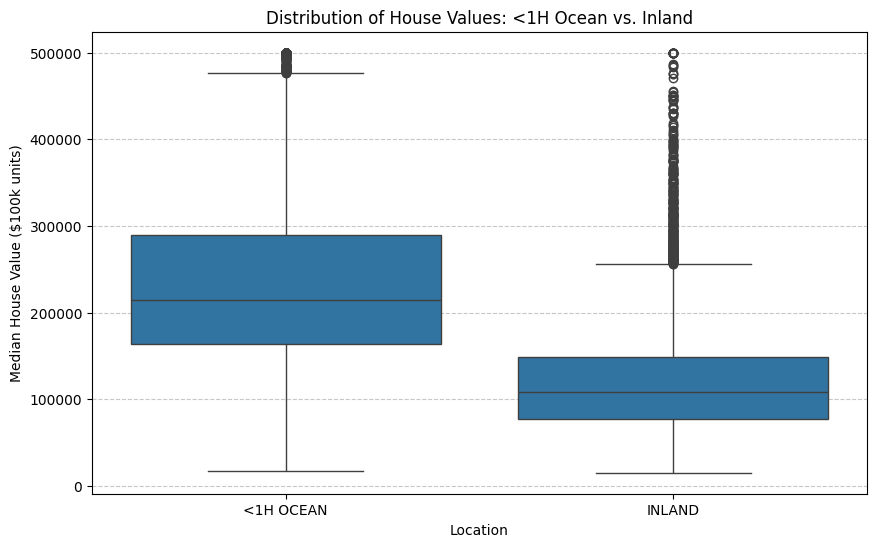

In [10]:
# 3. Visualization: Boxplot
plt.figure(figsize=(10, 6))
# Filter dataframe to only include the two groups we are testing
mask = df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df[mask])

plt.title('Distribution of House Values: <1H Ocean vs. Inland')
plt.ylabel('Median House Value ($100k units)')
plt.xlabel('Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How do we Interpret these results:

Our p-value is 0 so and our t-test results are 81.9067. With this in mind we should reject the null hypothesis and there is a significant difference between the group by the ocean and the group inland leading to our high result in t-test. 